In [2]:
import pandas as pd
import numpy as np
# import os
# import json


In [41]:
file_path = r'D:\\Documents\\Mémoire\\Data John Doe\\John Doe gaitway 3D locomotion_R16.txt'
output_file = r'D:\\Documents\\Mémoire\\Data John Doe\\Auto Python\\ResultPython_JD_R16.txt'

seuil_p=4.55
seuil_v=4.35

MAX_TIME_DIFF = 0.45
MIN_TIME_DIFF = 0.3

In [42]:
# Lire le fichier en ignorant les 43 premières lignes
data = pd.read_csv(file_path, delimiter='\t', header=None, skiprows=44)

# Extraire les colonnes nécessaires
time = data[0]
speed = data[19]
contact_mode = data[31]

# Initialiser les listes pour stocker les vallées, les peaks et les transitions de contact mode
valleys = []
peaks = []

# Previous value, should be "PIC", or "VAL"
was_previous = None

# Calculer la moyenne mobile
moving_average = speed.rolling(window=21, center=True).mean()

previous_type = None

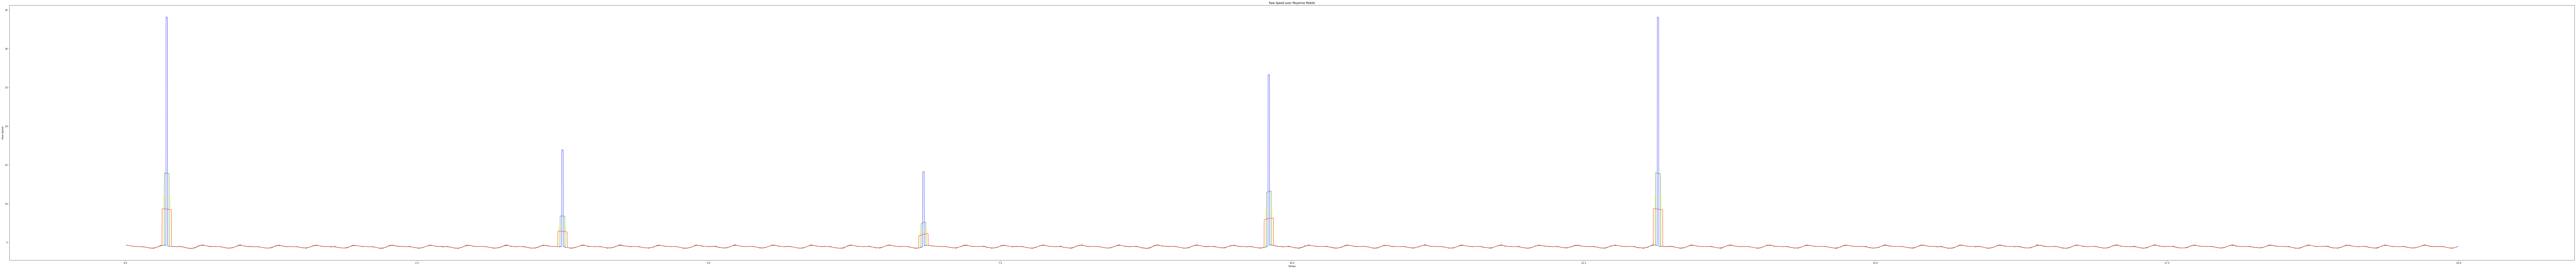

In [45]:
# graphique de raw speed avec moving average modifiable
import matplotlib.pyplot as plt
raw_speed = (1164.1/data[9])

# averages_vals_df = pd.DataFrame(averages_vals)
moving_average_raw_speed_1 = raw_speed.rolling(window=13, center=True).mean()
moving_average_raw_speed_2 = raw_speed.rolling(window=41, center=True).mean()
moving_average_raw_speed_3 = raw_speed.rolling(window=61, center=True).mean()
moving_average_raw_speed_4 = raw_speed.rolling(window=81, center=True).mean()

%matplotlib inline

moving_average_raw_speed_1_df = pd.DataFrame({'Time': time, 'Moving Average Raw Speed': moving_average_raw_speed_1})
moving_average_raw_speed_2_df = pd.DataFrame({'Time': time, 'Moving Average Raw Speed': moving_average_raw_speed_2})
moving_average_raw_speed_3_df = pd.DataFrame({'Time': time, 'Moving Average Raw Speed': moving_average_raw_speed_3})
moving_average_raw_speed_4_df = pd.DataFrame({'Time': time, 'Moving Average Raw Speed': moving_average_raw_speed_4})


plt.figure(figsize=(200, 20))
# plt.plot(averages_vals_df[0], averages_vals_df[1])
plt.plot(moving_average_raw_speed_1_df['Time'], moving_average_raw_speed_1_df['Moving Average Raw Speed'], label='Moyenne mobile de Raw Speed', color='blue', alpha=0.8)
plt.plot(moving_average_raw_speed_2_df['Time'], moving_average_raw_speed_2_df['Moving Average Raw Speed'], label='Moyenne mobile de Raw Speed', color='green', alpha=0.8)
plt.plot(moving_average_raw_speed_3_df['Time'], moving_average_raw_speed_3_df['Moving Average Raw Speed'], label='Moyenne mobile de Raw Speed', color='yellow', alpha=0.8)
plt.plot(moving_average_raw_speed_4_df['Time'], moving_average_raw_speed_4_df['Moving Average Raw Speed'], label='Moyenne mobile de Raw Speed', color='red', alpha=0.8)


plt.xlabel('Temps')
plt.ylabel('Raw Speed')
plt.title('Raw Speed avec Moyenne Mobile')
plt.show()

In [6]:
averages_vals = []

# Détecter les vallées et les peaks
for i in range(10, len(moving_average) - 10):
    if pd.notna(moving_average[i]):  # Vérifier que la valeur n'est pas NaN
        window = moving_average[i - 10:i + 11]
        min_value = window.min()
        max_value = window.max()

        is_vallee = moving_average[i] == min_value and moving_average[i] < seuil_v
        is_pic = moving_average[i] == max_value and moving_average[i] > seuil_p

        averages_vals.append((time[i], moving_average[i], ''))

        # Vérifier les peaks
        if is_pic and previous_type != "pic":
            peaks.append((time[i], moving_average[i], 'Pic'))
            previous_type = "pic"

        # Vérifier les vallées
        elif is_vallee and previous_type != "val":
            valleys.append((time[i], moving_average[i], 'Vallée'))
            previous_type = "val"

            
print(is_vallee)
            
print(is_pic)

False
False


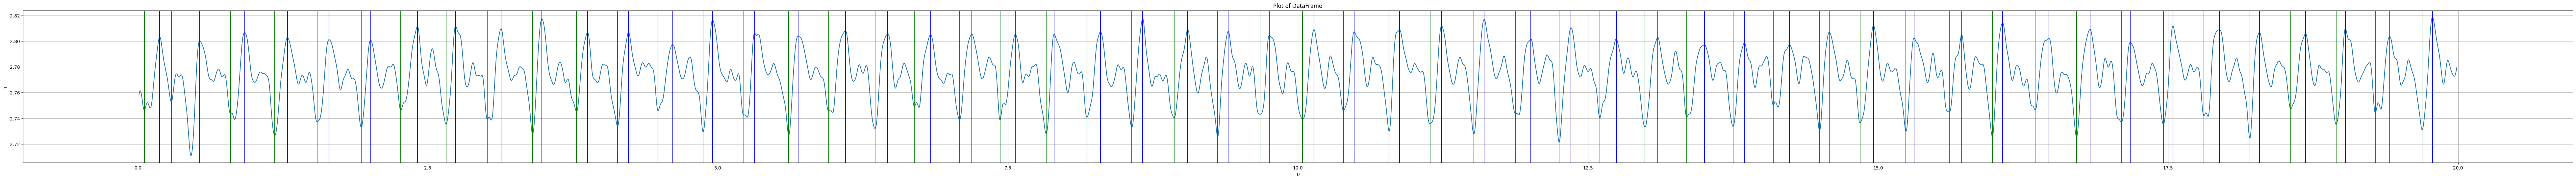

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))
peaks_df = pd.DataFrame(peaks)
valleys_df = pd.DataFrame(valleys)
averages_vals_df = pd.DataFrame(averages_vals)

plt.plot(averages_vals_df[0], averages_vals_df[1])

for i in range(len(valleys_df)):
    plt.axvline(x=valleys_df[0][i], color='green', label='valleys' if i == 0 else "")

for i in range(len(peaks_df)):
    plt.axvline(x=peaks_df[0][i], color='blue', label='peaks' if i == 0 else "")

plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [8]:
lift_down = []
lift_off = []

previous_mode = None
for i in range(len(contact_mode)):
    if pd.notna(contact_mode[i]):
        current_mode = contact_mode[i]
        if (previous_mode is None or previous_mode != 'SC') and current_mode == 'SC':
            lift_down.append((time[i], 'Pose de Pied'))
        previous_mode = current_mode
        
previous_mode = None
for i in range(len(contact_mode)):
    if pd.notna(contact_mode[i]):
        current_mode = contact_mode[i]
        if (previous_mode is None or previous_mode != 'Aerial') and current_mode == 'Aerial':
            lift_off.append((time[i], 'Levé de Pied'))
        previous_mode = current_mode
            

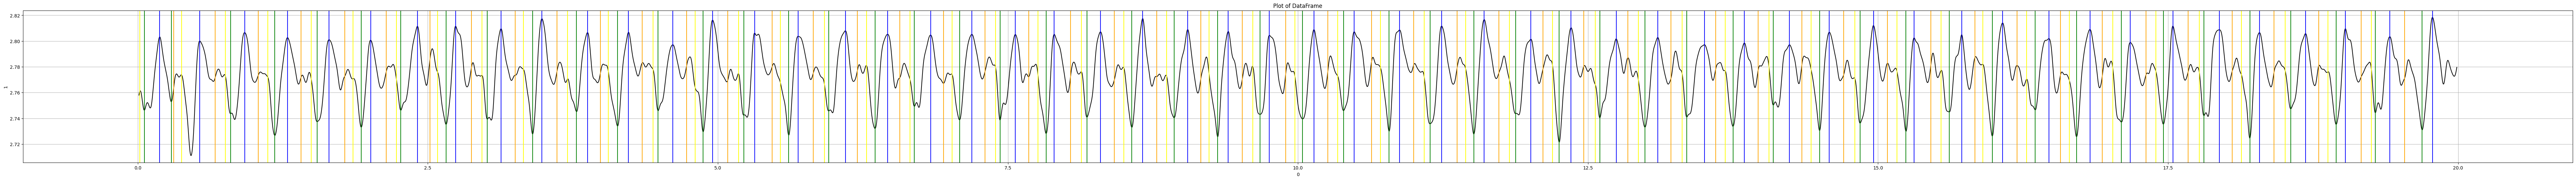

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))
peaks_df = pd.DataFrame(peaks)
valleys_df = pd.DataFrame(valleys)
averages_vals_df = pd.DataFrame(averages_vals)
lift_off_df = pd.DataFrame(lift_off)
lift_down_df = pd.DataFrame(lift_down)

plt.plot(averages_vals_df[0], averages_vals_df[1], color="black")

for i in range(len(valleys_df)):
    plt.axvline(x=valleys_df[0][i], color='green', label='valleys' if i == 0 else "")

for i in range(len(peaks_df)):
    plt.axvline(x=peaks_df[0][i], color='blue', label='peaks' if i == 0 else "")

for i in range(len(lift_down_df)):
    plt.axvline(x=lift_down_df[0][i], color='yellow', label='Pose de pas' if i == 0 else "")
    
for i in range(len(lift_off_df)):
    plt.axvline(x=lift_off_df[0][i], color='orange', label='Levé de pas' if i == 0 else "")


plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [10]:
# Créer des DataFrames pour les vallées, les peaks et les transitions
df_valleys = pd.DataFrame(valleys, columns=['Temps (ms)', 'Vitesse (m/s)', 'Type'])
df_peaks = pd.DataFrame(peaks, columns=['Temps (ms)', 'Vitesse (m/s)', 'Type'])
lift_down_df = pd.DataFrame(lift_down, columns=['Temps (ms)', 'Type'])
lift_off_df = pd.DataFrame(lift_off, columns=['Temps (ms)', 'Type'])





In [11]:
# Calculer la différence de temps entre chaque valeur (x+1) et x.
df_valleys['Différence de Temps (ms)'] = df_valleys['Temps (ms)'].diff().shift(-1).abs()
df_peaks['Différence de Temps (ms)'] = df_peaks['Temps (ms)'].diff().shift(-1).abs()
lift_down_df['Différence de Temps (ms)'] = lift_down_df['Temps (ms)'].diff().shift(-1).abs()
lift_off_df['Différence de Temps (ms)'] = lift_off_df['Temps (ms)'].diff().shift(-1).abs()


In [12]:
# Arrondir les valeurs de vitesse et de différence de temps
df_valleys['Vitesse (m/s)'] = df_valleys['Vitesse (m/s)'].round(5)
df_peaks['Vitesse (m/s)'] = df_peaks['Vitesse (m/s)'].round(5)
df_valleys['Différence de Temps (ms)'] = df_valleys['Différence de Temps (ms)'].round(4)
df_peaks['Différence de Temps (ms)'] = df_peaks['Différence de Temps (ms)'].round(4)
lift_down_df['Différence de Temps (ms)'] = lift_down_df['Différence de Temps (ms)'].round(4)
lift_off_df['Différence de Temps (ms)'] = lift_off_df['Différence de Temps (ms)'].round(4)



In [13]:
print("Pics:")
df_peaks

Pics:


,Temps (ms),Vitesse (m/s),Type,Différence de Temps (ms)
0,0.189,2.80322,Pic,0.345
1,0.534,2.80002,Pic,0.387
2,0.921,2.80656,Pic,0.370
3,1.291,2.80266,Pic,0.358
4,1.649,2.80104,Pic,0.358
5,2.007,2.80066,Pic,0.404
6,2.411,2.81148,Pic,0.328
7,2.739,2.81152,Pic,0.392
8,3.131,2.80957,Pic,0.352
9,3.483,2.81731,Pic,0.394


In [14]:
print("vallées:")
df_valleys

vallées:


,Temps (ms),Vitesse (m/s),Type,Différence de Temps (ms)
0,0.056,2.74631,Vallée,0.233
1,0.289,2.75292,Vallée,0.511
2,0.800,2.74362,Vallée,0.381
3,1.181,2.72674,Vallée,0.365
4,1.546,2.73742,Vallée,0.380
5,1.926,2.73311,Vallée,0.341
6,2.267,2.74629,Vallée,0.390
7,2.657,2.73534,Vallée,0.356
8,3.013,2.73935,Vallée,0.390
9,3.403,2.72782,Vallée,0.379


In [15]:
print("Pose Pied:")
lift_down_df

Pose Pied:


,Temps (ms),Type,Différence de Temps (ms)
0,0.019,Pose de Pied,0.360
1,0.379,Pose de Pied,0.376
2,0.755,Pose de Pied,0.365
3,1.120,Pose de Pied,0.376
4,1.496,Pose de Pied,0.359
5,1.855,Pose de Pied,0.375
6,2.230,Pose de Pied,0.355
7,2.585,Pose de Pied,0.382
8,2.967,Pose de Pied,0.356
9,3.323,Pose de Pied,0.381


In [16]:
print("Levé Pied:")
lift_off_df

Levé Pied:


,Temps (ms),Type,Différence de Temps (ms)
0,0.311,Levé de Pied,0.356
1,0.667,Levé de Pied,0.372
2,1.039,Levé de Pied,0.369
3,1.408,Levé de Pied,0.377
4,1.785,Levé de Pied,0.356
5,2.141,Levé de Pied,0.378
6,2.519,Levé de Pied,0.357
7,2.876,Levé de Pied,0.378
8,3.254,Levé de Pied,0.359
9,3.613,Levé de Pied,0.376


In [17]:
def check_values(df):
    if not df.empty:
        errors = []
        df['Errors'] = [None] * len(df['Différence de Temps (ms)'])
        # Vérifier les différences de temps pour les valeurs
        for index, row in df.iterrows():
            if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                df.loc[index, "Errors"] = "ERR"
                errors.append(index)

        if len(errors) > 0:
            msg = ', '.join(map(str, errors))
            print(f"{len(errors)} Erreurs sur les index {msg}\n")

if valleys is not None and peaks is not None and lift_down is not None and lift_off is not None:
    print("Vérification pour valleys\n")
    check_values(df_valleys)
    print("Vérification pour peaks\n")
    check_values(df_peaks)
    print("Vérification pour Pose de pied\n")
    check_values(lift_down_df)
    print("Vérification pour Levé de pied\n")
    check_values(lift_off_df)

Vérification pour valleys

2 Erreurs sur les index 0, 1

Vérification pour peaks

Vérification pour Pose de pied

Vérification pour Levé de pied



In [18]:
def write_results_to_file(valleys, peaks, lift_down, lift_off, output_file):
    with open(output_file, 'w') as f:
        f.write("Vallées détectées:\t")
        if not valleys.empty:
            f.write(f"({len(valleys)})\n")
            valleys.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les vallées
            for index, row in valleys.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les vallées\n")
        else:
            f.write("Aucune vallée détectée.\n")


        f.write("\nPics détectés:\t")
        if not peaks.empty:
            f.write(f"({len(peaks)})\n")
            peaks.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les peaks
            for index, row in peaks.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les peaks\n")
        else:
            f.write("Aucun pic détecté.\n")


        f.write("\nPied posé dans contact_mode :\t")
        if not lift_down.empty:
            f.write(f"({len(lift_down)})\n")
            lift_down.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les transitions
            for index, row in lift_down.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les Pose de pied\n")
        else:
            f.write("Aucune pose de pied détectée.\n")


        f.write("\nPied levé dans contact_mode :\t")
        if not lift_off.empty:
            f.write(f"({len(lift_off)})\n")
            lift_off.to_csv(f, index=False, sep='\t', lineterminator="\n")
            # Vérifier les différences de temps pour les transitions
            for index, row in lift_off.iterrows():
                if row['Différence de Temps (ms)'] > MAX_TIME_DIFF or row['Différence de Temps (ms)'] < MIN_TIME_DIFF:
                    f.write(f"Erreur: Différence de temps {row['Différence de Temps (ms)']} ms à l'index {index} pour les Pose de pied\n")
        else:
            f.write("Aucune pose de pied détectée.\n")

def write_results_to_excel(valleys, peaks, lift_off, lift_down, output_file):
    # Create a Pandas Excel writer using XlsxWriter as the engine
    with pd.ExcelWriter(output_file) as writer:
        # Write each dataframe to a different worksheet
        valleys.to_excel(writer, sheet_name='Vallées', index=False)
        peaks.to_excel(writer, sheet_name='Pics', index=False)
        lift_off.to_excel(writer, sheet_name='Levé de pied', index=False)
        lift_down.to_excel(writer, sheet_name='Pose de pied', index=False)

    print(f"Dataframes were successfully written to {output_file}")

if valleys is not None and peaks is not None and lift_down is not None and lift_off is not None :
    write_results_to_file( df_valleys, df_peaks, lift_down_df, lift_off_df, output_file)
    write_results_to_excel(df_valleys, df_peaks, lift_down_df, lift_off_df, output_file.replace(".txt", ".xlsx"))
    print(f"Les résultats ont été écrits dans le fichier : {output_file}")

Dataframes were successfully written to D:\\Documents\\Mémoire\\Data John Doe\\Auto Python\\ResultPython_JD_R10.xlsx
Les résultats ont été écrits dans le fichier : D:\\Documents\\Mémoire\\Data John Doe\\Auto Python\\ResultPython_JD_R10.txt


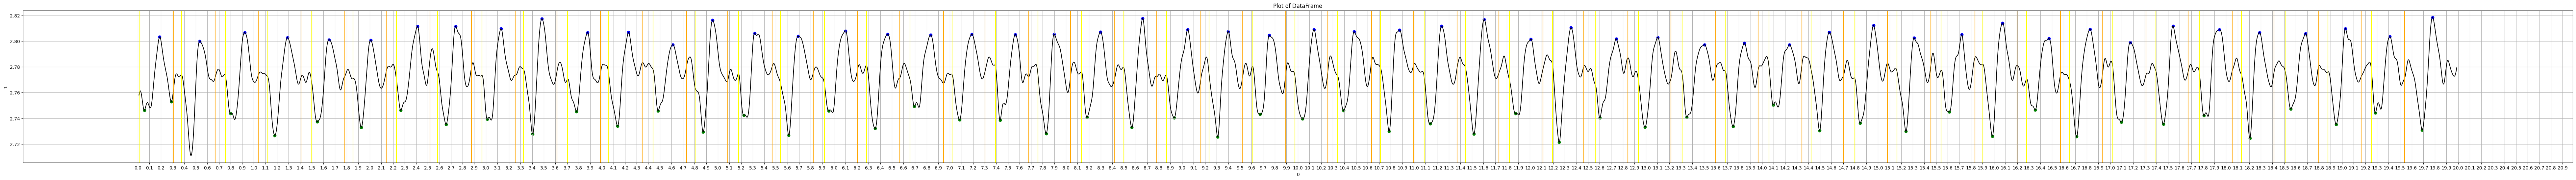

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))


plt.scatter(df_valleys['Temps (ms)'], df_valleys['Vitesse (m/s)'],  color='green', label='valleys')
plt.scatter(df_peaks['Temps (ms)'], df_peaks['Vitesse (m/s)'],  color='blue', label='peaks')
plt.plot(averages_vals_df[0], averages_vals_df[1], color="black")

# Tracer les barres verticales pour lift_off et lift_down
for i in range(len(lift_off_df)):
    plt.axvline(x=lift_off_df['Temps (ms)'][i], color='orange', label='Levé de pas' if i == 0 else "")
for i in range(len(lift_down_df)):
    plt.axvline(x=lift_down_df['Temps (ms)'][i], color='yellow', label='Pose de pas' if i == 0 else "")

plt.xticks(np.arange(0, max(averages_vals_df[0]) + 1, 0.1))
plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()

In [20]:
averages_vals_df.to_excel('data.xlsx', sheet_name="averages_vals", index=False)

In [21]:
# Compare differences


In [22]:
valleys_diff = df_valleys['Différence de Temps (ms)'].dropna().values
peaks_diff = df_peaks['Différence de Temps (ms)'].dropna().values
lift_down_diff = lift_down_df['Différence de Temps (ms)'].dropna().values
lift_off_diff = lift_off_df['Différence de Temps (ms)'].dropna().values

In [23]:
min_len = min(len(valleys_diff), len(peaks_diff), len(lift_down_diff), len(lift_off_diff))

valleys_diff = valleys_diff[:min_len]
peaks_diff = peaks_diff[:min_len]
lift_down_diff = lift_down_diff[:min_len]
lift_off_diff = lift_off_diff[:min_len]


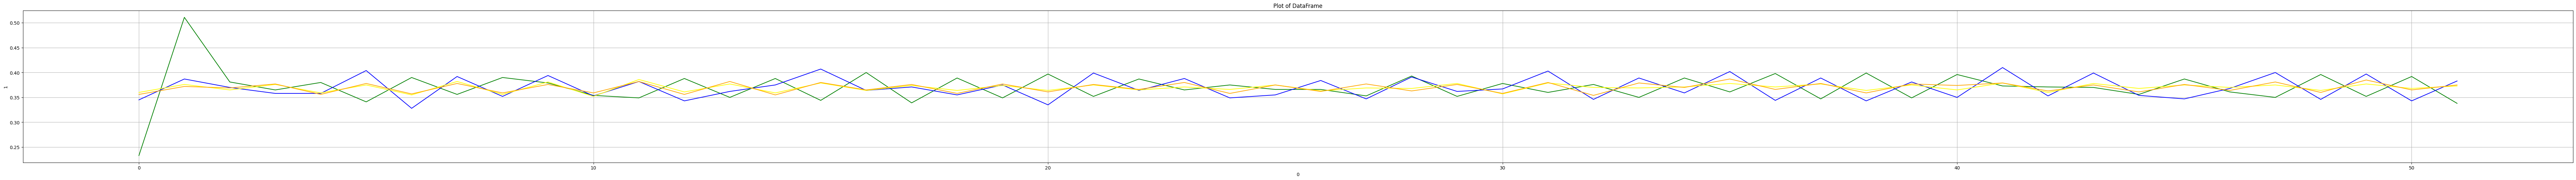

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(100, 6))


plt.plot(valleys_diff,  color='green', label='valleys')
plt.plot(peaks_diff,  color='blue', label='peaks')
plt.plot(lift_down_diff,  color='yellow', label='lift_down')
plt.plot(lift_off_diff,  color='orange', label='lift_off')



plt.xlabel('0')
plt.ylabel('1')
plt.title('Plot of DataFrame')
plt.grid(True)
plt.show()